In [ ]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/workshop.css", "r").read()
    return HTML(styles)
css_styling()

## Goals

* Libraries:  what they are, what we use them for.
* Load a library, numpy, and use it.
* Read CSV files.
* Assign values to variables
* Select individual values and subsections from data.
* Perform operations on arrays.
* Display graphs.

In order to load the inflammation data, we're going to use a library known as NumPy.  NumPy is a powerful Python library that operates efficiently on collections of numbers, especially as matrices and arrays.  Here's how we load NumPy:

In [2]:
import numpy

Once we've loaded the library, we can use it to read our data file.

In [3]:
numpy.loadtxt('data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

What is that command we just entered?  To get help in the iPython notebook, you can always try this help command.  When you're finished with the help screen, click the x in the top right to dismiss it.

In [4]:
?numpy.loadtxt

The expression ```numpy.loadtxt(...)``` is a function call that asks Python to run the function loadtxt that belongs to the numpy library. This dotted notation is used everywhere in Python to refer to the parts of things as thing.component.

numpy.loadtxt has two parameters: the name of the file we want to read, and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

When we are finished typing and press Shift+Enter, the notebook runs our command. Since we haven’t told it to do anything else with the function’s output, the notebook displays it. In this case, that output is the data we just loaded. By default, only a few rows and columns are shown (with ... to omit elements when displaying big arrays). To save space, Python displays numbers as 1. instead of 1.0 when there’s nothing interesting after the decimal point.

---
#### Exercise 1:

Use the syntax above to load another CSV file in the data directory.

#### Exercise 2:

What happens if you remove the 'delimiter' argument from the function call?

---

In [5]:
#Exercise 1
numpy.loadtxt('data/inflammation-02.csv',delimiter=',')

array([[ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  2., ...,  0.,  2.,  1.],
       [ 0.,  1.,  2., ...,  0.,  2.,  1.],
       ..., 
       [ 0.,  0.,  2., ...,  0.,  2.,  0.],
       [ 0.,  0.,  0., ...,  2.,  2.,  0.],
       [ 0.,  1.,  2., ...,  3.,  2.,  0.]])

In [6]:
#Exercise 2
numpy.loadtxt('data/inflammation-02.csv')

ValueError: invalid literal for float(): 0,0,0,1,3,4,6,5,2,7,7,8,6,11,5,6,10,4,5,9,15,15,14,13,14,12,10,9,8,8,6,6,6,6,5,4,2,1,1,0

Our call to numpy.loadtxt read our file, but didn’t save the data in memory. To do that, we need to assign the array to a variable. A variable is just a name for a value, such as x, current_temperature, or subject_id. Python’s variables must begin with a letter and are case sensitive. We can create a new variable by assigning a value to it using =. As an illustration, let’s step back and instead of considering a table of data, consider the simplest “collection” of data, a single value. The line below assigns the value 55 to a variable weight_kg:

In [7]:
weight_kg = 55

Once a variable has a value, we can print it to the screen:

In [8]:
print weight_kg

55


and do arithmetic with it:

In [9]:
print 'weight in pounds:', 2.2*weight_kg

weight in pounds: 121.0


We can also change a variable’s value by assigning it a new one:

In [10]:
weight_kg = 57.5
print 'weight in kilograms is now:', weight_kg

weight in kilograms is now: 57.5


As the example above shows, we can print several things at once by separating them with commas.

If we imagine the variable as a sticky note with a name written on it, assignment is like putting the sticky note on a particular value:

![Figure: Variables as sticky notes](images/python-sticky-note-variables-01.svg)

This means that assigning a value to one variable does not change the values of other variables. For example, let’s store the subject’s weight in pounds in a variable:

In [11]:
weight_lb = 2.2 * weight_kg
print 'weight in kilograms:', weight_kg, 'and in pounds:', weight_lb

weight in kilograms: 57.5 and in pounds: 126.5


![Creating another variable](images/python-sticky-note-variables-02.svg)

and then change ```weight_kg```:

In [12]:
weight_kg = 100.0
print 'weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb

weight in kilograms is now: 100.0 and weight in pounds is still: 126.5


![Updating a variable](images/python-sticky-note-variables-03.svg)

Since ```weight_lb doesn’t``` “remember” where its value came from, it isn’t automatically updated when ```weight_kg``` changes. This is different from the way spreadsheets work.

---

####Exercise 3:  

Look up today's temperature in Fahrenheit.  Store the result in a variable called ```temp_f```.  Then, because Brad and I are both Canadian, convert that temperature to Celsius and store the result in another variable called ```temp_c```.

---

In [30]:
#Exercise 3
temp_f = 70
temp_c = (temp_f-32)*(5.0/9)
print 'Temperature in fahrenheit is: ', temp_f, ' and in celsius is: ', temp_c

Temperature in fahrenheit is:  70  and in celsius is:  21.1111111111


Just as we can assign a single value to a variable, we can also assign an array of values to a variable using the same syntax. Let’s re-run ```numpy.loadtxt``` and save its result:

In [15]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

This statement doesn’t produce any output because assignment doesn’t display anything. If we want to check that our data has been loaded, we can print the variable’s value:

In [16]:
print data

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


Now that our data is in memory, we can start doing things with it. First, let’s ask what type of thing data refers to:

In [17]:
print type(data)

<type 'numpy.ndarray'>


The output tells us that data currently refers to an N-dimensional array created by the NumPy library. We can see what its shape is like this:

In [18]:
print data.shape

(60, 40)


This tells us that data has 60 rows and 40 columns. When we created the variable ```data``` to store our arthritis data, we didn’t just create the array, we also created information about the array, called members or attributes. This extra information describes data in the same way an adjective describes a noun. data.shape is an attribute of data which described the dimensions of data. We use the same dotted notation for the attributes of variables that we use for the functions in libraries because they have the same part-and-whole relationship.

If we want to get a single number from the array, we must provide an index in square brackets, just as we do in math:

In [19]:
print 'first value in data:', data[0, 0]

first value in data: 0.0


In [20]:
print 'middle value in data:', data[30, 20]

middle value in data: 13.0


The expression ```data[30, 20]``` may not surprise you, but ```data[0, 0]``` might. Programming languages like Fortran and MATLAB start counting at 1, because that’s what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because that’s simpler for computers to do. As a result, if we have an $M×N$ array in Python, its indices go from 0 to $M-1$ on the first axis and 0 to $N-1$ on the second. It takes a bit of getting used to, but one way to remember the rule is that the index is how many steps we have to take from the start to get the item we want.

<div class="alert alert-info">
What may also surprise you is that when Python displays an array, it shows the element with index [0, 0] in the upper left corner rather than the lower left. This is consistent with the way mathematicians draw matrices, but different from the Cartesian coordinates. The indices are (row, column) instead of (column, row) for the same reason, which can be confusing when plotting data.
</div>

An index like ```[30, 20]``` selects a single element of an array, but we can select whole sections as well. For example, we can select the first ten days (columns) of values for the first four (rows) patients like this:

In [21]:
print data[0:4,0:10]

[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]


The slice 0:4 means, “Start at index 0 and go up to, but not including, index 4.” Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We don’t have to start slices at 0:

In [22]:
print data[5:10, 0:10]

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


We also don’t have to include the upper and lower bound on the slice. If we don’t include the lower bound, Python uses 0 by default; if we don’t include the upper, the slice runs to the end of the axis, and if we don’t include either (i.e., if we just use ‘:’ on its own), the slice includes everything:

In [23]:
small = data[:3, 36:]
print 'small is:'
print small

small is:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]


---

#### Exercise 4

What would you enter to select every measurement for the 3rd patient?  (hint:  remember that arrays in Python are indexed from 0!).  

What would you enter to select the 3rd measurement from every patient?

---

In [32]:
# Exercise 4
# Note that we index with 2 because of zero-indexing.  0 is the first patient; 1 is the second patient; 2 is the third.
print data[2,:]
print data[:,2]

[  0.   1.   1.   3.   3.   2.   6.   2.   5.   9.   5.   7.   4.   5.   4.
  15.   5.  11.   9.  10.  19.  14.  12.  17.   7.  12.  11.   7.   4.   2.
  10.   5.   4.   2.   2.   3.   2.   2.   1.   1.]
[ 1.  2.  1.  2.  1.  1.  2.  1.  0.  1.  0.  0.  2.  0.  2.  1.  0.  0.
  2.  2.  1.  2.  0.  1.  1.  2.  1.  1.  2.  0.  1.  2.  2.  2.  1.  0.
  2.  1.  0.  1.  0.  1.  1.  1.  1.  2.  2.  1.  1.  1.  2.  2.  0.  2.
  2.  1.  1.  1.  0.  1.]


<div class="alert alert-success">
Slicing strings
</div>

A section of an array is called a slice. We can take slices of character strings as well:

In [33]:
element = 'oxygen'
print 'first three characters:', element[0:3]
print 'last three characters:', element[3:6]

first three characters: oxy
last three characters: gen


---

#### Exercise 5

What is the value of element[:4]? What about element[4:]? Or element[:]?

What is element[-1]? What is element[-2]? Given those answers, explain what element[1:-1] does.

#### Exercise 6

Create a string variable that contains the sentence 'The quick brown fox jumps over the lazy dog.'

Craft an expression that will isolate and print the word 'fox' from the variable.

---

In [47]:
#Exercise 5
print element[:4]
print element[4:]
print element[:]

print element[-1]
print element[-2]
print element[1:-1]

oxyg
en
oxygen
n
e
xyge


Arrays also know how to perform common mathematical operations on their values. The simplest operations with data are arithmetic: add, subtract, multiply, and divide. When you do such operations on arrays, the operation is done on each individual element of the array. Thus:

In [34]:
doubledata = data * 2.0

will create a new array doubledata whose elements have the value of two times the value of the corresponding elements in data:

In [35]:
print 'original:'
print data[:3, 36:]
print 'doubledata:'
print doubledata[:3, 36:]

original:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]
doubledata:
[[ 4.  6.  0.  0.]
 [ 2.  2.  0.  2.]
 [ 4.  4.  2.  2.]]


If, instead of taking an array and doing arithmetic with a single value (as above) you did the arithmetic operation with another array of the same shape, the operation will be done on corresponding elements of the two arrays. Thus:

In [36]:
tripledata = doubledata + data

will give you an array where ```tripledata[0,0]``` will equal ```doubledata[0,0]``` plus ```data[0,0]```, and so on for all other elements of the arrays.

In [37]:
print 'tripledata:'
print tripledata[:3, 36:]

tripledata:
[[ 6.  9.  0.  0.]
 [ 3.  3.  0.  3.]
 [ 6.  6.  3.  3.]]


Often, we want to do more than add, subtract, multiply, and divide values of data. Arrays also know how to do more complex operations on their values. If we want to find the average inflammation for all patients on all days, for example, we can just ask the array for its mean value

In [38]:
print data.mean()

6.14875


mean is a method of the array, i.e., a function that belongs to it in the same way that the member shape does. If variables are nouns, methods are verbs: they are what the thing in question knows how to do. We need empty parentheses for data.mean(), even when we’re not passing in any parameters, to tell Python to go and do something for us. data.shape doesn’t need () because it is just a description but data.mean() requires the () because it is an action.

NumPy arrays have lots of useful methods:

In [39]:
print 'maximum inflammation:', data.max()
print 'minimum inflammation:', data.min()
print 'standard deviation:', data.std()

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


When analyzing data, though, we often want to look at partial statistics, such as the maximum value per patient or the average value per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation:

 

In [40]:
patient_0 = data[0, :] # 0 on the first axis, everything on the second
print 'maximum inflammation for patient 0:', patient_0.max()
 

maximum inflammation for patient 0: 18.0


We don’t actually need to store the row in a variable of its own. Instead, we can combine the selection and the method call:

In [41]:
print 'maximum inflammation for patient 2:', data[2, :].max()

maximum inflammation for patient 2: 19.0


What if we need the maximum inflammation for all patients (as in the next diagram on the left), or the average for each day (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis:

![Operations across axes](images/python-operations-across-axes.svg)

To support this, most array methods allow us to specify the axis we want to work on. If we ask for the average across axis 0 (rows in our 2D example), we get:

In [42]:
print data.mean(axis=0)

[  0.           0.45         1.11666667   1.75         2.43333333   3.15
   3.8          3.88333333   5.23333333   5.51666667   5.95         5.9
   8.35         7.73333333   8.36666667   9.5          9.58333333
  10.63333333  11.56666667  12.35        13.25        11.96666667
  11.03333333  10.16666667  10.           8.66666667   9.15         7.25
   7.33333333   6.58333333   6.06666667   5.95         5.11666667   3.6
   3.3          3.56666667   2.48333333   1.5          1.13333333
   0.56666667]


In [43]:
print data.mean(axis=0).shape

(40,)


The expression (40,) tells us we have an $N×1$ vector, so this is the average inflammation per day for all patients. If we average across axis 1 (columns in our 2D example), we get:

In [44]:
print data.mean(axis=1)

[ 5.45   5.425  6.1    5.9    5.55   6.225  5.975  6.65   6.625  6.525
  6.775  5.8    6.225  5.75   5.225  6.3    6.55   5.7    5.85   6.55
  5.775  5.825  6.175  6.1    5.8    6.425  6.05   6.025  6.175  6.55
  6.175  6.35   6.725  6.125  7.075  5.725  5.925  6.15   6.075  5.75
  5.975  5.725  6.3    5.9    6.75   5.925  7.225  6.15   5.95   6.275  5.7
  6.1    6.825  5.975  6.725  5.7    6.25   6.4    7.05   5.9  ]


which is the average inflammation per patient across all days.

---

#### Exercise 7

Any intro stats class will tell you that the median is a more robust statistic to outliers than the mean, and the professor will wax poetic about its virtues.

NumPy arrays do not have a built-in method to calculate the median, but the numpy library *does* have a method.  

    median_array = numpy.arange(100)
    print 'Median is: ', numpy.median(median_array)
    
Try entering those commands.  Wondering what ```arange``` does?  Remmeber the help command above.

Once you understand the use of ```numpy.median```, combine it with the axis parameter above (see the help command!). 

Compare the daily median and mean inflammation across patients.  What do you notice?

---

In [49]:
#Exercise 7
median_array = numpy.arange(100)
print 'Median is: ', numpy.median(median_array)

print numpy.median(data,axis=1)

Median is:  49.5
[ 4.5  4.5  5.   5.5  5.   5.   5.   5.   6.   5.   5.   5.   5.5  5.   4.
  5.5  5.5  4.5  6.   6.   4.   5.5  5.   5.   5.   7.   4.   5.   5.   5.
  6.   5.5  6.   5.5  5.   4.5  5.   5.   5.   4.   5.   5.   5.5  5.5  6.
  5.   6.5  5.   6.   5.   5.   5.   6.   6.   5.   5.   5.   6.   6.5  5. ]


The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture (or course) of its own, but we can explore a few features of Python’s ```matplotlib``` library here. While there is no “official” plotting library, this package is the de facto standard. First, we will import the ```pyplot``` module from ```matplotlib``` and use two of its functions to create and display a heat map of our data:

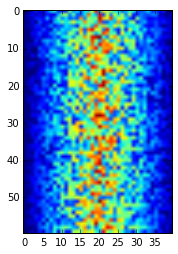

In [50]:
%matplotlib inline
import matplotlib.pyplot

image  = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show(image)

<div class="alert alert-warning">
The line %matplotlib inline is called an iPython 'magic'.  It instructs the notebook to place the plots you produce into the same window;  if you see your plot pop out into a new window, rerun the cell above so that plots will be inline.
</div>

Blue regions in this heat map are low values, while red shows high values. As we can see, inflammation rises and falls over a 40-day period. Let’s take a look at the average inflammation over time:

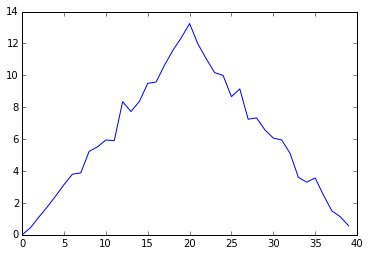

In [51]:
ave_inflammation = data.mean(axis=0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)
matplotlib.pyplot.show(ave_plot)

Here, we have put the average per day across all patients in the variable ```ave_inflammation```, then asked ```pyplot``` to create and display a line graph of those values. The result is roughly a linear rise and fall, which is suspicious: based on other studies, we expect a sharper rise and slower fall. Let’s have a look at two other statistics:

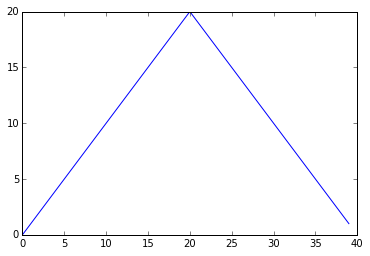

In [52]:
max_plot = matplotlib.pyplot.plot(data.max(axis=0))
matplotlib.pyplot.show(max_plot)

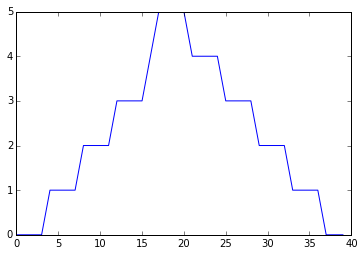

In [53]:
min_plot = matplotlib.pyplot.plot(data.min(axis=0))
matplotlib.pyplot.show(min_plot)

The maximum value rises and falls perfectly smoothly, while the minimum seems to be a step function. Neither result seems particularly likely, so either there’s a mistake in our calculations or something is wrong with our data.

You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function ```matplotlib.pyplot.figure()``` creates a space into which we will place all of our plots. The parameter ```figsize``` tells Python how big to make this space. Each subplot is placed into the figure using the ```subplot``` command. The subplot command takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameters denotes which subplot your variable is referencing. Each subplot is stored in a different variable (axes1, axes2, axes3). Once a subplot is created, the axes are can be titled using the ```set_xlabel()``` command (or ```set_ylabel()```). Here are our three plots side by side:

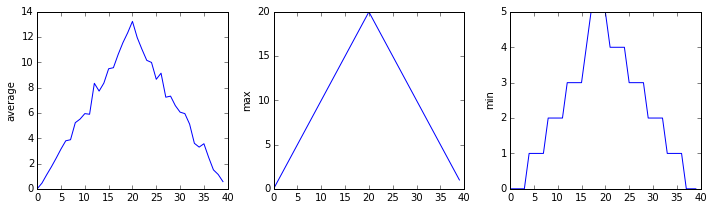

In [55]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(data.mean(axis=0))

axes2.set_ylabel('max')
axes2.plot(data.max(axis=0))

axes3.set_ylabel('min')
axes3.plot(data.min(axis=0))

fig.tight_layout()

matplotlib.pyplot.show(fig)

The call to ```loadtxt``` reads our data, and the rest of the program tells the plotting library how large we want the figure to be, that we’re creating three sub-plots, what to draw for each one, and that we want a tight layout. (Perversely, if we leave out that call to ```fig.tight_layout()```, the graphs will actually be squeezed together more closely.)

---

#### Exercise 8

Let's get a slightly better look at the data by plotting on the same graph.

We'll plot four lines on the same graph: the max, the min, the mean, and the median.

To do so, modify the script above.  You will need to create only a single axes object, as such:

    axes = fig.add_subplot(1,1,1)
    
and call all four plot commands on this axes object.  **Plot the max of the data first** (Why?).

Bonus:  Use ```?matplotlib.pyplot.ylim()```, and use it to give the figure a little more room.

#### Exercise 9

Use Google to determine how to calculate the standard deviation of the data using NumPy.  Then, plot the standard deviation of the inflammation data for each day across all patients.

---

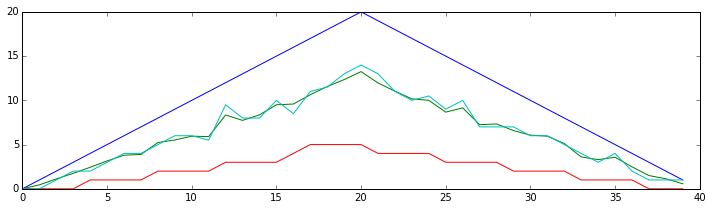

In [63]:
#Exercise 8
fig = matplotlib.pyplot.figure(figsize=(10.0,3.0))

axes = fig.add_subplot(1,1,1)
axes.plot(data.max(axis=0))
axes.plot(data.mean(axis=0))
axes.plot(data.min(axis=0))
axes.plot(numpy.median(data,axis=0))

fig.tight_layout()

matplotlib.pyplot.show(fig)

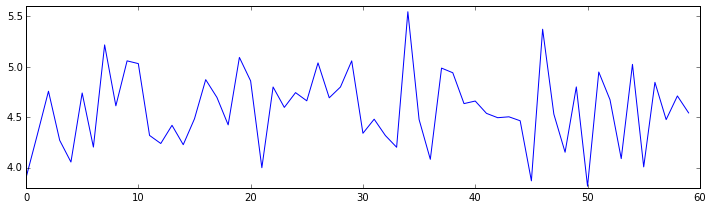

In [65]:
#Exercise 9
fig = matplotlib.pyplot.figure(figsize=(10.0,3.0))

axes = fig.add_subplot(1,1,1)
axes.plot(numpy.std(data,axis=1))

fig.tight_layout()

matplotlib.pyplot.show(fig)